In [23]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output
%matplotlib inline

---
# Part 1

set parameters

In [106]:
NX    = 10
NY    = 10
XMIN  = 0
XMAX  = 1
YMIN  = 0
YMAX  = 1
NITER = 50  # max number of iterations

Initialize the grids

In [107]:
u = np.zeros(shape=(NX,NY))

set initial conditions (assume 0 everywhere)

In [108]:
def initial(u,nx=NX,ny=NY):
    u[:,:] = 0
    return u

Boundary conditions

In [109]:
def set_boundary_conditions(u,nx=NX,ny=NY):
    """
    Input: u[i][j]
    
    Output: u[i][j]
    
    B.C.: top    (y=1): u = 1
          button (y=0): u = 0
          left   (x=0): u = 0
          right  (x=1): u = 0
    """

    (nx, ny) = u.shape

    u[0,:]   = 0  # left
    u[nx-1,:]= 0  # right
    u[:,0]   = 0  # bottom
    u[:,ny-1]= 1  # top
    
    return u

## Jacobi method
Do one iteration

In [75]:
def evolve_jacobi(u,nx=NX,ny=NY):
    """
    do one Jacobi iteration
    
    Inputs: u[size of NX][size of NY]
    NX: number of points in x-axis
    NY: number of points in y-axis
    
    Outputs: u
    
    """

    # Apply BC
    u = set_boundary_conditions(u)
    uold = u.copy()

    # Calculate u next
    for i in range(1,NX-1):
        for j in range(1,NY-1):
            u[i,j] = 0.25*(uold[i,j+1] + uold[i,j-1] + uold[i+1,j] + uold[i-1,j])
    
    # print(u)

    return u

Check convergence by comparing the differecne between u1 and u2

In [76]:
def diff(u1,u2,nx=NX,ny=NY):
    error = 0.0
    for i in range(nx):
        for j in range(ny):
            error += abs(u1[i,j] - u2[i,j])
    return error

Start iterations

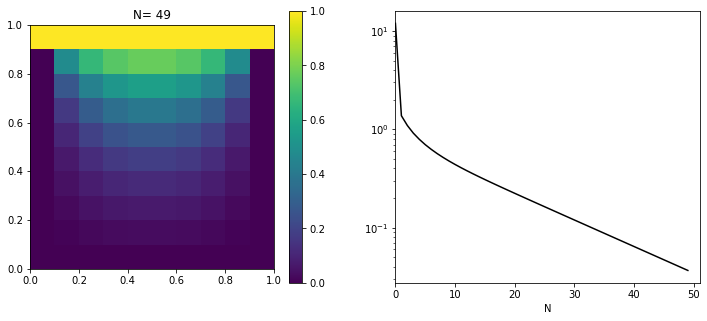

In [67]:
u = initial(u)
errors = np.zeros(NITER)
for n in range(NITER):
    
    plt.figure(1,figsize=(12,5))
    plt.subplot(121)
    plt.title("N= {}".format(n))
    clear_output(wait=True)
    
    # make a copy of the u in the previous step
    uold = u.copy()
    
    # do one iteration
    u = evolve_jacobi(u)

    # check the difference
    err = diff(uold,u)
    errors[n] = err
    
    # plot the results
    plt.imshow(u.T,origin='lower',extent=[XMIN,XMAX,YMIN,YMAX],interpolation='none')
    plt.colorbar()
    plt.subplot(122)
    plt.plot(errors,'k-')
    plt.xlim([0,NITER+1])
    plt.xlabel("N")
    plt.yscale('log')
    #time.sleep(0.0001)
    plt.show()

---
# Part 2

## Gauss-Seidel method

In [110]:
def evolve_gauss_seidel(u):
    """
    do one Gauss-Seidel iteration
    """

    # Apply BC
    u = set_boundary_conditions(u)
    uold = u.copy()

    # Shape
    (nx, ny) = u.shape

    # Calculate u next
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            u[i,j] = 0.25*(u[i,j+1] + u[i,j-1] + u[i+1,j] + u[i-1,j])

    return u

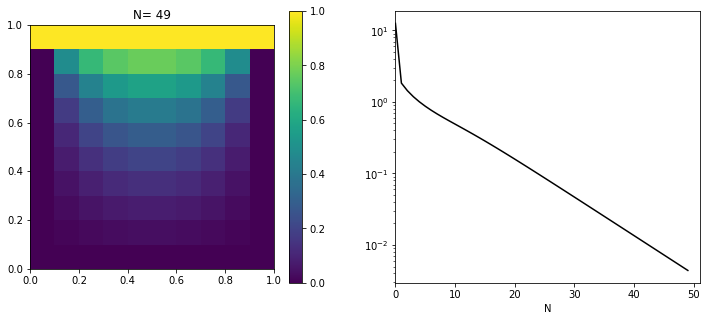

In [111]:
#TODO: Visualize the results here

u = initial(u)
errors = np.zeros(NITER)
for n in range(NITER):
    
    plt.figure(1,figsize=(12,5))
    plt.subplot(121)
    plt.title("N= {}".format(n))
    clear_output(wait=True)
    
    # make a copy of the u in the previous step
    uold = u.copy()
    
    # do one iteration
    u = evolve_gauss_seidel(u)

    # check the difference
    err = diff(uold,u)
    errors[n] = err
    
    # plot the results
    plt.imshow(u.T,origin='lower',extent=[XMIN,XMAX,YMIN,YMAX],interpolation='none')
    plt.colorbar()
    plt.subplot(122)
    plt.plot(errors,'k-')
    plt.xlim([0,NITER+1])
    plt.xlabel("N")
    plt.yscale('log')
    #time.sleep(0.0001)
    plt.show()

---
# Part 3

## Successive over-relax method:

w < 1 : under-relaxation
w = 1 : Gauss-Seidel method
w > 1 : over-relaxation

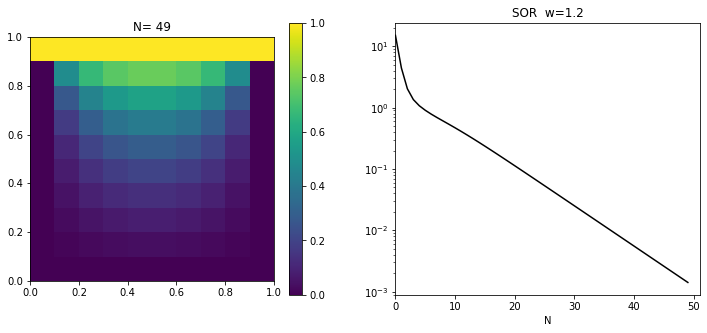

In [70]:
#TODO: Visualize the results here

w = 1.2  # Set w 

u = initial(u)
errors = np.zeros(NITER)
for n in range(NITER):
    
    plt.figure(1,figsize=(12,5))
    plt.subplot(121)
    plt.title("N= {}".format(n))
    clear_output(wait=True)
    
    # make a copy of the u in the previous step
    uold = u.copy()
    
    # do one iteration
    u = (1-w)*uold + w*evolve_gauss_seidel(u)

    # check the difference
    err = diff(uold,u)
    errors[n] = err
    
    # plot the results
    plt.imshow(u.T,origin='lower',extent=[XMIN,XMAX,YMIN,YMAX],interpolation='none')
    plt.colorbar()
    plt.subplot(122)
    plt.plot(errors,'k-')
    plt.xlim([0,NITER+1])
    plt.xlabel("N")
    plt.yscale('log')
    #time.sleep(0.0001)
    plt.title('SOR  w=1.2')
    plt.show()

---
# Part 4

## Implement the multigrid method using the full multigrid method



In [117]:
NX1   = 25
NY1   = 25
NX2   = 50
NY2   = 50
NX3   = 100
NY3   = 100
NITER = 100
u1 = np.zeros(shape=(NX1,NY1))
u2 = np.zeros(shape=(NX2,NY2))
u3 = np.zeros(shape=(NX3,NY3))

In [118]:
def restriction(u_fine,u_coarser,NXC,NYC):
    """
    from fine grid to coarser grid.
    Assume the gird size is different by a factor of 2
    
    update the coarser grid based on information of the fine grid
    
    Inputs:
    
    u_fine: size of 2 NXC and 2 NYC
    u_coarser: size of NXC and NYC
    
    
    Outputs:
    
    u: size of NXC and NYC
    
    
    """

    # Copy the dimension of coarser grid
    uout = u_coarser

    for i in range(NXC):
        for j in range(NYC):
            uout[i,j] = 0.25*( u_fine[2*i,2*j]   + u_fine[2*i+1, 2*j] \
                             + u_fine[2*i,2*j+1] + u_fine[2*i+1, 2*j+1])


    return uout  

In [119]:
def prolongation(u_fine, u_coarser,NXC, NYC):
    """
    from coarser grid to fine grid
    
    update the fine grid based on information of the coarser grid
    
    Inputs:
    
    u_fine: size of 2 NXC and 2 NYC
    u_coarser: size of NXC and NYC
    
    
    Outputs:
    
    u: size of 2 NXC and 2 NYC
    
    """

    uout = u_fine

    for i in range(2*NXC):
        for j in range(2*NYC):
            # To simplify the problem, we could do direct mapping without interpolation
            uout[i,j] = u_coarser[int(i/2), int(j/2)]
    
                
    return uout

In [120]:
def full_multigrid(u, NX=NX1, NY=NY1):
    
    u3 = u     # level 3
    u2 = np.zeros((NX*2, NY*2))
    u1 = np.zeros((NX, NY))

    # The full multigrid cycle start from coarser grid
    u2 = restriction(u3, u2, NX*2, NY*2)
    u1 = restriction(u2, u1, NX, NY)


    u1 = evolve_gauss_seidel(u1)       # solve
    u2 = prolongation(u2, u1, NX, NY)  # go up
    u2 = evolve_gauss_seidel(u2)       # solve
    u1 = restriction(u2, u1, NX, NY)   # go down
    u1 = evolve_gauss_seidel(u1)       # solve
    u2 = prolongation(u2, u1, NX, NY)  # go up
    u2 = evolve_gauss_seidel(u2)       # solve
    u3 = prolongation(u3, u2, NX*2, NY*2) # go up
    u3 = evolve_gauss_seidel(u3)          # solve
    u2 = restriction(u3, u2, NX*2, NY*2)  # go down
    u2 = evolve_gauss_seidel(u2)       # solve
    u1 = restriction(u2, u1, NX, NY)   # go down
    u1 = evolve_gauss_seidel(u1)       # solve
    u2 = prolongation(u2, u1, NX, NY)  # go up
    u2 = evolve_gauss_seidel(u2)       # solve
    u3 = prolongation(u3, u2, NX*2, NY*2) # go up
    u3 = evolve_gauss_seidel(u3)          # solve

    return u3


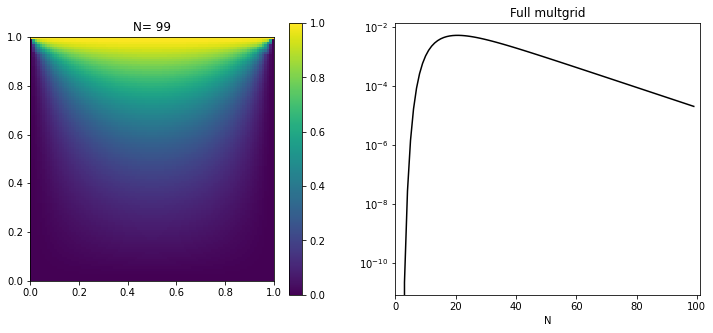

In [121]:
#TODO: To the full multigird cycle here and Visualize the results

# Initialize the grid
u = np.zeros(shape=(NX3,NY3))
u = initial(u)
# u = set_boundary_conditions(u, nx=NX3, ny=NY3)

errors = np.zeros(NITER)
for n in range(NITER):
    
    plt.figure(1,figsize=(12,5))
    plt.subplot(121)
    plt.title("N= {}".format(n))
    clear_output(wait=True)
    
    # make a copy of the u in the previous step
    uold = u.copy()
    
    # do one iteration
    u = full_multigrid(u)

    # check the difference
    err = diff(uold,u)
    errors[n] = err
    
    # plot the results
    plt.imshow(u.T,origin='lower',extent=[XMIN,XMAX,YMIN,YMAX],interpolation='none')
    plt.colorbar()
    plt.subplot(122)
    plt.plot(errors,'k-')
    plt.xlim([0,NITER+1])
    plt.xlabel("N")
    plt.yscale('log')
    plt.title('Full multgrid')
    #time.sleep(0.0001)
    plt.show()